# Social Network Ads

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
df.Gender.value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Age'>

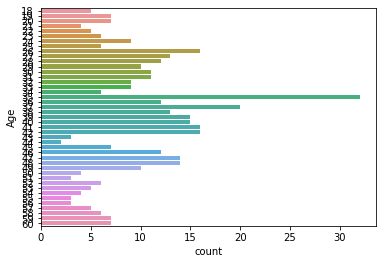

In [8]:
sns.countplot(y='Age',data=df)

<AxesSubplot:xlabel='count', ylabel='Age'>

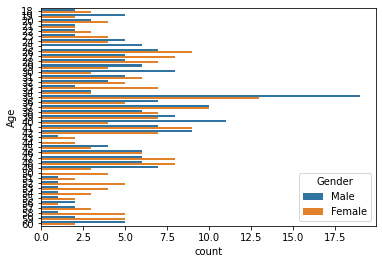

In [10]:
sns.countplot(y='Age',data=df,hue='Gender')

<AxesSubplot:xlabel='Gender', ylabel='Age'>

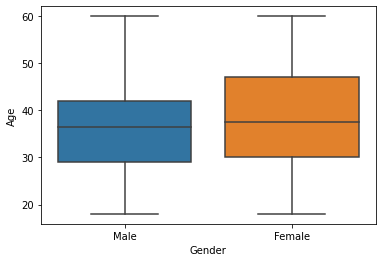

In [13]:
sns.boxplot(x='Gender',y='Age',data=df)

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Density'>

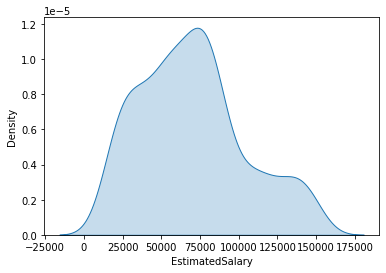

In [14]:
sns.kdeplot(x=df['EstimatedSalary'],shade=True)

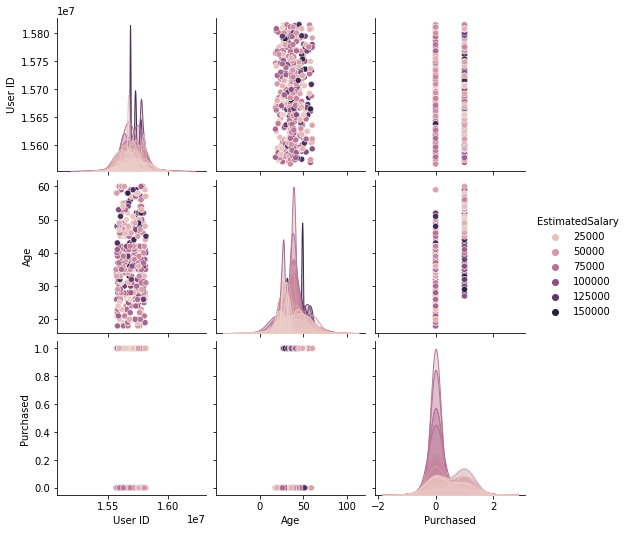

In [15]:
sns.pairplot(df,hue='EstimatedSalary')

In [16]:
df['User ID'].value_counts()

15624510    1
15767681    1
15589449    1
15791373    1
15688172    1
           ..
15675185    1
15792102    1
15722758    1
15745232    1
15594041    1
Name: User ID, Length: 400, dtype: int64

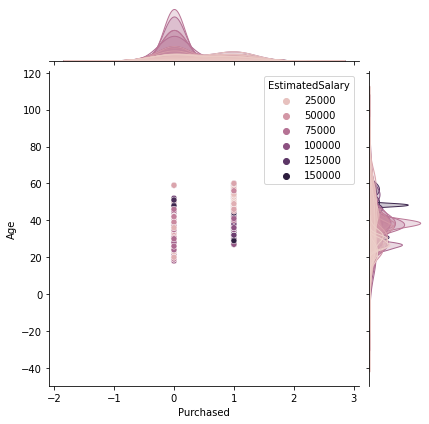

In [18]:
sns.jointplot(x='Purchased',y='Age',data=df,hue='EstimatedSalary')

In [19]:
df=pd.get_dummies(df,columns=['Age'],drop_first=True)
df

,User ID,Gender,EstimatedSalary,Purchased,Age_19,Age_20,Age_21,Age_22,Age_23,Age_24,...,Age_51,Age_52,Age_53,Age_54,Age_55,Age_56,Age_57,Age_58,Age_59,Age_60
0,15624510,Male,19000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15810944,Male,20000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15668575,Female,43000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15603246,Female,57000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,15804002,Male,76000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,15691863,Female,41000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
396,15706071,Male,23000,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
397,15654296,Female,20000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
398,15755018,Male,33000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
x=df.drop('Gender',axis=1)
y=df['Gender']


In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y)

In [23]:
y_train.value_counts()/len(y_train)

Female    0.509375
Male      0.490625
Name: Gender, dtype: float64

In [25]:
!pip install imblearn

     ------------------------------------ 199.1/199.1 KB 862.5 kB/s eta 0:00:00


In [26]:
from imblearn.over_sampling import SMOTE
sampler=SMOTE()
x_train,y_train=sampler.fit_resample(x_train,y_train)

In [27]:
y_train.value_counts()

Female    163
Male      163
Name: Gender, dtype: int64

In [28]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

E:\Programming\IDLE\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [30]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score,fbeta_score

In [31]:
models={
    'LR':LogisticRegression(),
    'KNN':KNeighborsClassifier(n_neighbors=7),
    'DT':DecisionTreeClassifier(),
    'SVC':SVC(),
    'RF':RandomForestClassifier(n_estimators=60),
    'XGBC':XGBClassifier(),
    'NB':GaussianNB()
}

In [36]:
for name,model in models.items():
    print(f'using: {name}')
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(f'train accuarcy:{accuracy_score(y_train,model.predict(x_train))}')
    print(f'test accuarcy:{accuracy_score(y_test,y_pred)}')
    #print(f'recall: {recall_score(y_test,y_pred)}')
    #print(f'precision: {precision_score(y_test,y_pred)}')
    #print(f'f1score: {f1_score(y_test,y_pred)}')
    #print(f'fbeta: {fbeta_score(y_test,y_pred,beta=0.5)}')

using: LR
train accuarcy:0.647239263803681
test accuarcy:0.575
using: KNN
train accuarcy:0.6257668711656442
test accuarcy:0.475
using: DT
train accuarcy:1.0
test accuarcy:0.475
using: SVC
train accuarcy:0.647239263803681
test accuarcy:0.55
using: RF
train accuarcy:1.0
test accuarcy:0.525
using: XGBC


E:\Programming\IDLE\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:37:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
train accuarcy:0.9938650306748467
test accuarcy:0.5375
using: NB
train accuarcy:0.5705521472392638
test accuarcy:0.5125


In [37]:
model=XGBClassifier()
model.fit(x_train,y_train)

[22:37:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\Programming\IDLE\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [38]:
x.columns

Index(['User ID', 'EstimatedSalary', 'Purchased', 'Age_19', 'Age_20', 'Age_21',
       'Age_22', 'Age_23', 'Age_24', 'Age_25', 'Age_26', 'Age_27', 'Age_28',
       'Age_29', 'Age_30', 'Age_31', 'Age_32', 'Age_33', 'Age_34', 'Age_35',
       'Age_36', 'Age_37', 'Age_38', 'Age_39', 'Age_40', 'Age_41', 'Age_42',
       'Age_43', 'Age_44', 'Age_45', 'Age_46', 'Age_47', 'Age_48', 'Age_49',
       'Age_50', 'Age_51', 'Age_52', 'Age_53', 'Age_54', 'Age_55', 'Age_56',
       'Age_57', 'Age_58', 'Age_59', 'Age_60'],
      dtype='object')

In [39]:
import joblib
joblib.dump(model,'model.h5')
joblib.dump(scaler,'scaler.h5')
joblib.dump(x.columns,'features.h5')

['features.h5']

# Titanic

In [40]:
df=pd.read_csv('Titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [41]:
from sklearn.feature_selection import RFE
model=LogisticRegression()
selector=RFE(estimator=model,n_features_to_select=5)
selector.fit(x,y)

RFE(estimator=LogisticRegression(), n_features_to_select=5)

In [42]:
selector.get_params

<bound method BaseEstimator.get_params of RFE(estimator=LogisticRegression(), n_features_to_select=5)>

In [43]:
selector.support_

array([ True,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

In [44]:
x.columns

Index(['User ID', 'EstimatedSalary', 'Purchased', 'Age_19', 'Age_20', 'Age_21',
       'Age_22', 'Age_23', 'Age_24', 'Age_25', 'Age_26', 'Age_27', 'Age_28',
       'Age_29', 'Age_30', 'Age_31', 'Age_32', 'Age_33', 'Age_34', 'Age_35',
       'Age_36', 'Age_37', 'Age_38', 'Age_39', 'Age_40', 'Age_41', 'Age_42',
       'Age_43', 'Age_44', 'Age_45', 'Age_46', 'Age_47', 'Age_48', 'Age_49',
       'Age_50', 'Age_51', 'Age_52', 'Age_53', 'Age_54', 'Age_55', 'Age_56',
       'Age_57', 'Age_58', 'Age_59', 'Age_60'],
      dtype='object')

In [45]:
x.columns[selector.support_]

Index(['User ID', 'EstimatedSalary', 'Purchased', 'Age_35', 'Age_40'], dtype='object')

In [46]:
x_new=x[x.columns[selector.support_]]
x_new

,User ID,EstimatedSalary,Purchased,Age_35,Age_40
0,15624510,19000,0,0,0
1,15810944,20000,0,1,0
2,15668575,43000,0,0,0
3,15603246,57000,0,0,0
4,15804002,76000,0,0,0
...,...,...,...,...,...
395,15691863,41000,1,0,0
396,15706071,23000,1,0,0
397,15654296,20000,1,0,0
398,15755018,33000,0,0,0


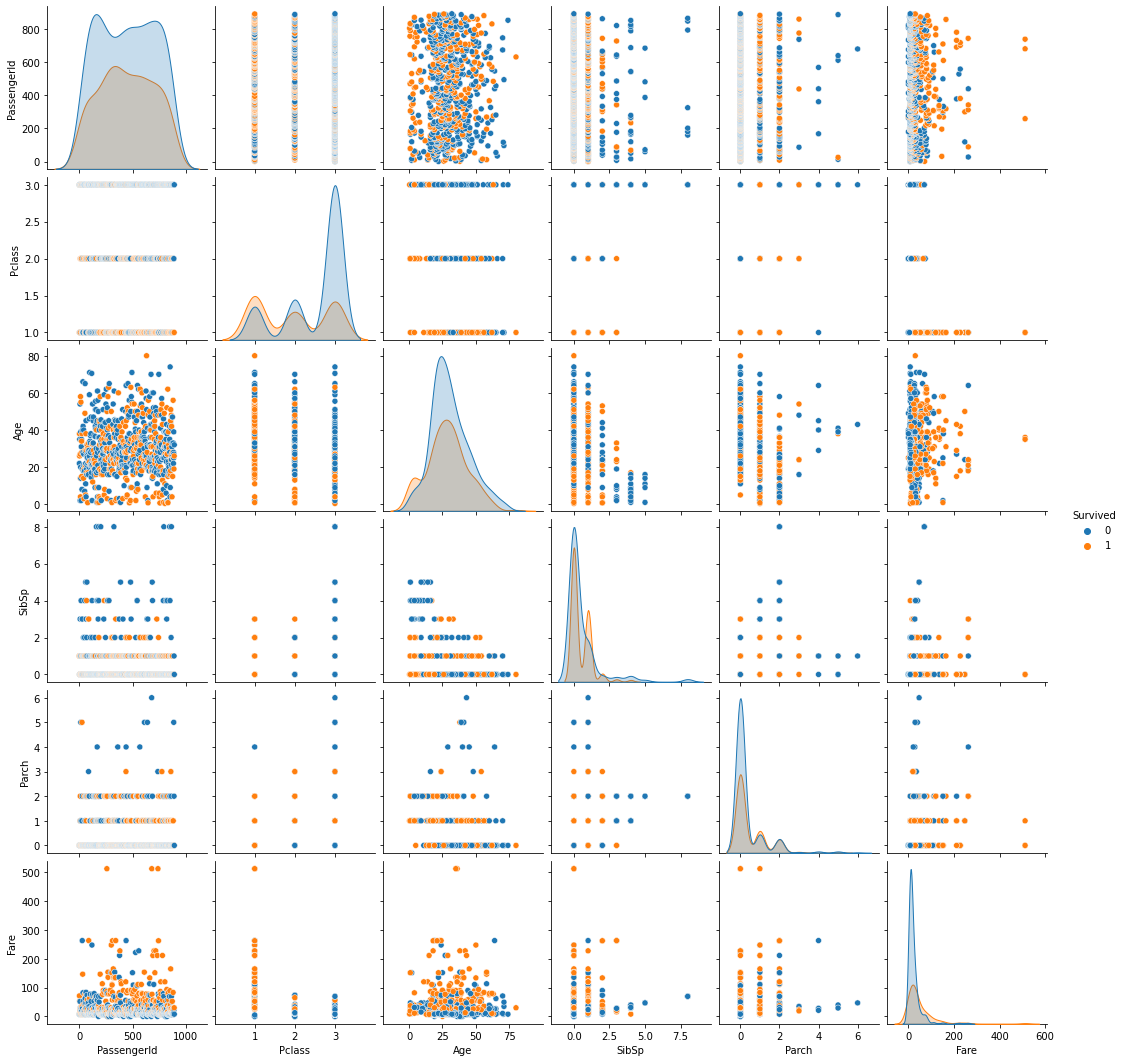

In [47]:
sns.pairplot(df,hue='Survived')

In [48]:
c=df.Age.value_counts().head(10)
c.index

Float64Index([24.0, 22.0, 18.0, 19.0, 28.0, 30.0, 21.0, 25.0, 36.0, 29.0], dtype='float64')

In [49]:
df_n=df[df['Age'].isin(c.index)]
df_n

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
37,38,0,3,"Cann, Mr. Ernest Charles",male,21.0,0,0,A./5. 2152,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S


In [50]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [51]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Age'>

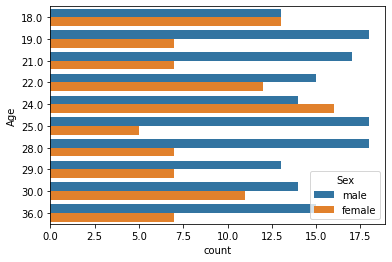

In [55]:
sns.countplot(y='Age',data=df_n,hue='Sex')